# Daten einlesen

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [22]:
# Importing the dataset
dataset = pd.read_excel('diabetes-1698240260.xlsx', sheet_name='data', header=2, usecols="A:I")

In [23]:
dataset.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [24]:
dataset.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Beschreibung der Merkmale:
- n_Pregnant ist stetig und verhältnisskaliert
- gtt ist stetig und verhältnisskaliert
- blood_pressure ist stetig und verhältnisskaliert
- triceps_skin_fold_thickness ist stetig und verhältnisskaliert
- insulin ist stetig und verhältnisskaliert
- bmi ist stetig und verhältnisskaliert
- dpf ist stetig und ordinal
- age ist stetig und verhältnisskaliert
- class ist diskret und nominal

# Exploration

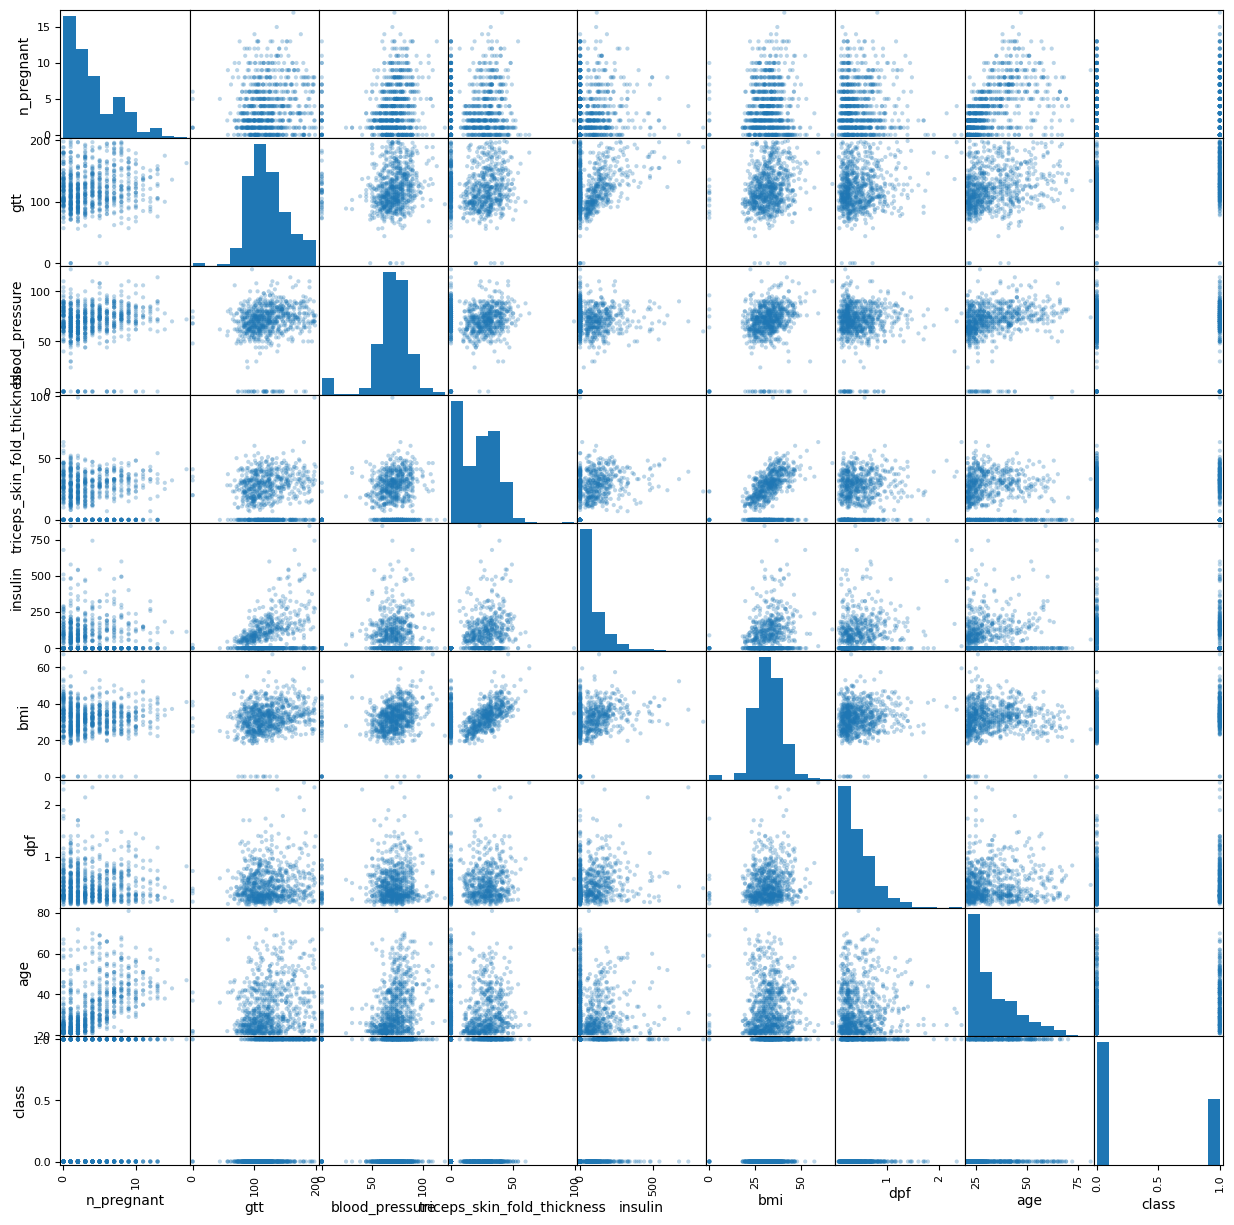

In [25]:
scatter_matrix(dataset, alpha=0.3, figsize=(15, 15), diagonal='hist')
plt.show()

Beim Histogram des Blutdrucks (blood_pressure) fällt auf, dass es viele Werte mit 0 gibt. Das ist nicht plausibel da diese Personen sonst tot wären. Auch beim ggt-, BMI- und Insulin-Wert gibt es einige 0-Werte.
Auch Nullen bei der Trizeps-Hautfaltendicke sind schwierig zu beurteilen. Hier kommt es darauf an wie dieser Wert gemessen wurde.

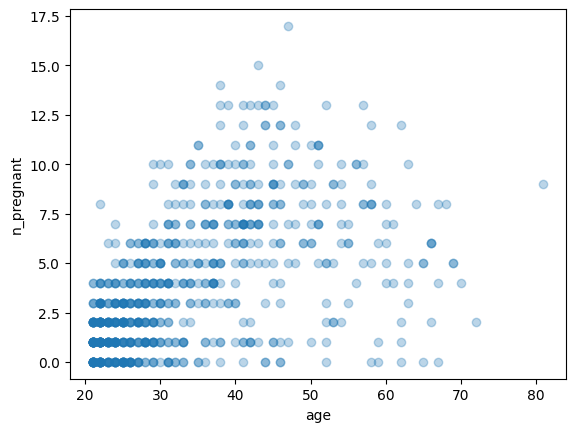

In [26]:
plt.scatter(dataset['age'], dataset['n_pregnant'], alpha=0.3)
plt.xlabel('age')
plt.ylabel('n_pregnant')
plt.show()

Hier sind einige Ausreisser zu sehen. Beispielsweise eine 22-Jährige die acht mal Schwanger war. Jedoch ist das nicht unplausibel.

## Fehlende Werte ersetzen

In [27]:
dataset['gtt'].replace(0, np.nan, inplace=True)
dataset['blood_pressure'].replace(0, np.nan, inplace=True)
dataset['insulin'].replace(0, np.nan, inplace=True)
dataset['bmi'].replace(0, np.nan, inplace=True)


C:\Users\denis\AppData\Local\Temp\ipykernel_20760\2454292944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['gtt'].replace(0, np.nan, inplace=True)
C:\Users\denis\AppData\Local\Temp\ipykernel_20760\2454292944.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [28]:
dataset.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,767.000000,762.000000,732.000000,767.000000,394.000000,756.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,20.517601,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.540786,12.390616,15.954059,118.775855,6.929448,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,76.250000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,190.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


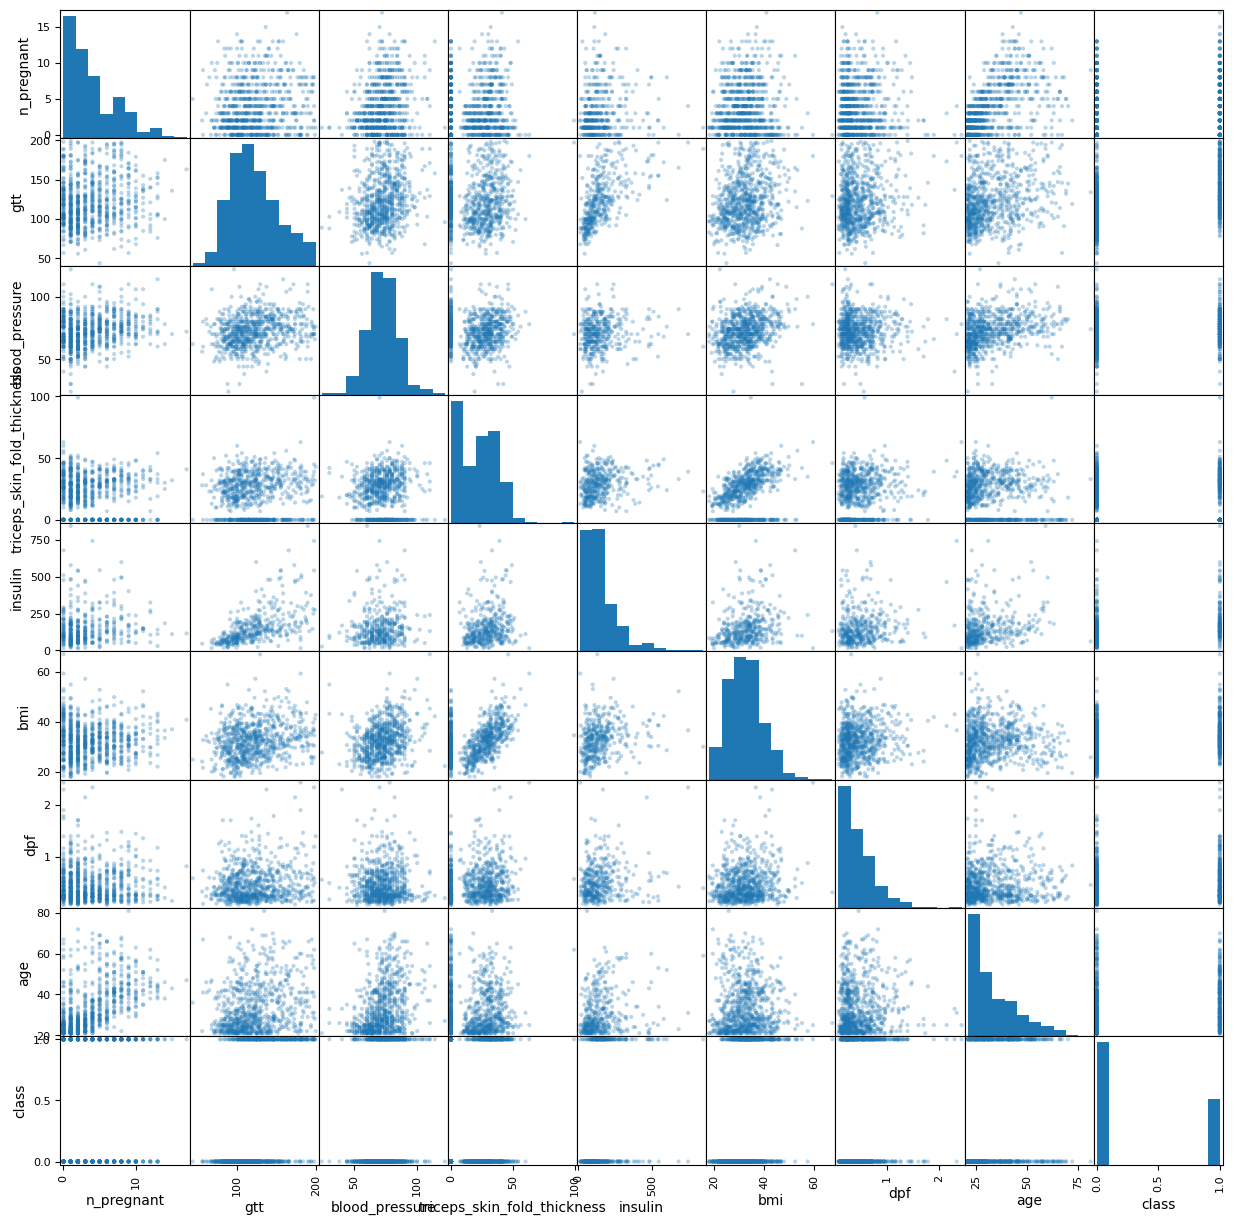

In [29]:
scatter_matrix(dataset, alpha=0.3, figsize=(15, 15), diagonal='hist')
plt.show()

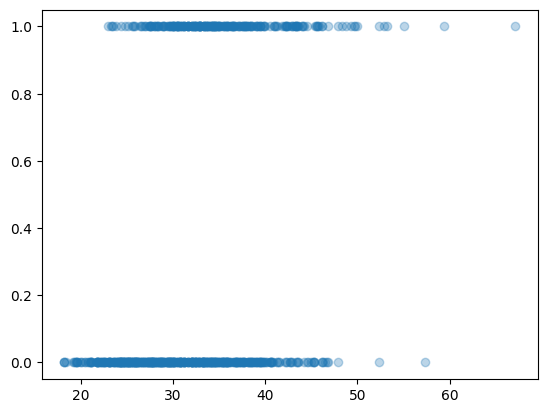

In [30]:
plt.scatter(dataset['bmi'], dataset['class'], alpha=0.3)

In [ ]:
# Make Correlation Matrix